### Perceptron
$X \in R_{n \times d + 1}$,
$W\in R_{d + 1 \times 1}$,
$Y \in R_{n \times 1}$

1. Hypothesis :
$\mathcal{H} = sign(X W)$


2. Cost function :
$\mathcal{L}(W) = ||- Y H||_1$


3. Boundary decision :
$\mathcal{B} = w_d x_d + .... + w_0$

### Stochastic gradient descent algorithm

1. Initialize weight w to any random number : $W_0 = \Theta$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.


3. Repeat until no error point :  $ W_{t+1} = W_t - \eta ~ \mathcal{L}'(W_t; x_i, y_i)$

**Note:**  $\mathcal{L}'(W_t; x_i, y_i) = -y_i x_i$

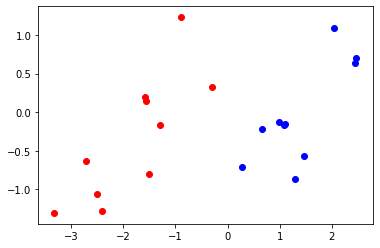

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
means = [[-1.5, 0], [1.5, 0]]
cov = [[.3, .2], [.2, .3]]

# generate data (gauss distribution)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

_X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -np.ones(N)))

# show graph
plt.scatter(_X[:N,0], _X[:N,1], c="red")
plt.scatter(_X[N:,0], _X[N:,1], c="blue")
plt.show()

X = np.concatenate((np.ones((2*N, 1)), _X), axis = 1)

In [9]:
# predict label of each row of X, given w
def predict(X, w):
    return np.sign(X.dot(w))
# perform perceptron learning algorithm
def peceptron(X, y, w_init):
    w = w_init
    while True:
        pred = predict(X, w) # predict label -1 & 1
        mis_indxs = np.where(np.not_equal(pred, y))
        num_mis = mis_indxs[0].shape[0]
        if num_mis == 0 : return w
        random_id = np.random.choice(mis_indxs[0], 1)[0]
        w = w + y[random_id]*X[random_id]

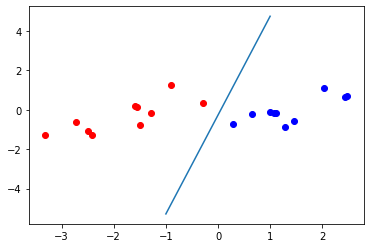

In [12]:
w = peceptron(X, y, np.random.randn(X.shape[1]))
# show graph
plt.scatter(_X[:N,0], _X[:N,1], c="red")
plt.scatter(_X[N:,0], _X[N:,1], c="blue")

dom = [-1, 1]
val = [(w[0] + w[1]*x)/w[2] for x in dom]
plt.plot(dom, val); plt.show()

### Pocket Algorithm (Perceptron)

1. Initialize weight w to any random number : $W_0 = \Theta$

2. Pick a value for the learning rate $\eta$.
    - If α is very small, it would take long time to converge.
    - If α is large, it may fail to converge and overshoot the minimum.


3. Repeat N loop :  $ W_{t+1} = W_t - \eta ~ \mathcal{L}'(W_t; x_i, y_i)$

**Note:**  $\mathcal{L}'(W_t; x_i, y_i) = -y_i x_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
means = [[-.5, 0], [.5, 0]]
cov = [[.3, .2], [.2, .3]]

# generate data (gauss distribution)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

_X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -np.ones(N)))

# show graph
plt.scatter(_X[:N,0], _X[:N,1], c="red")
plt.scatter(_X[N:,0], _X[N:,1], c="blue")
plt.show()

X = np.concatenate((np.ones((2*N, 1)), _X), axis = 1)
y = y.reshape(1, 20)

<Figure size 640x480 with 1 Axes>

In [2]:
# predict label of each row of X, given w
def predict(X, w):
    return np.sign(X.dot(w))
# perform perceptron learning algorithm
def peceptron(X, y, w_init, loop):
    w =  w_best = w_init
    num_mis = num_mis_best = N
    for it in range(loop):
        pred = predict(X, w.T)
        chck = np.equal(y, pred)
        num_mis = len(chck[0]) - chck.sum()
        if num_mis < num_mis_best: 
            w_best = w
            num_mis_best = num_mis
        w = w + y.dot(X)
    return w_best

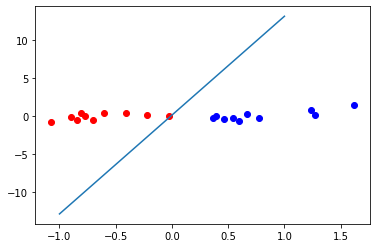

In [3]:
w = peceptron(X, y, np.random.randn(X.shape[1]).T, 10000)
# show graph
plt.scatter(_X[:N,0], _X[:N,1], c="red")
plt.scatter(_X[N:,0], _X[N:,1], c="blue")

dom = [-1, 1]
val = [(w[0][0] + w[0][1]*x)/w[0][2] for x in dom]
plt.plot(dom, val); plt.show()